In [1]:
import sys
#sys.path.insert(1, '/home/user/Research/base-WingWatch')
sys.path.insert(1, '/home/main/Research/WingWatch')

from WingWatch.Equipment import station
from WingWatch.Equipment import antenna
from WingWatch.Intersections import montecarlo
from WingWatch.Tools import translation
from WingWatch.Calibration import clean_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
cleaned_gps_data = clean_data.clean_gps_data_csv("track_points.csv")


/home/main/Research/WingWatch/WingWatch/Calibration/clean_data.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gps_reduced_col['time'] = pd.to_datetime(df_gps_reduced_col['time']).astype(int) / 10**9


In [3]:
cleaned_tag_data = clean_data.clean_motus_Tag_data("allTagsSub390_1.csv",start_date="",end_date='2025-06-30',calibration_tags_list=[82521,82516])


/home/main/Research/WingWatch/WingWatch/Calibration/clean_data.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_tags_only['port'] = port_cleaned


In [12]:
SOI = ['SE_Light_434','Black_Rock_434','BIWF_Turbine1']
SOI_Lat = [41.15308,41.14792,41.12579]
SOI_Long = [-71.55141,-71.59009,-71.50742]
SOI_Alt = [20,20,20]

In [13]:
data_dataframe = clean_data.merge_gps_and_tag_data(cleaned_tag_data,cleaned_gps_data,stations_of_interest=SOI)


In [15]:
for i in range(len(SOI)):
    for j in range(5):
        temp_data_frame = clean_data.generate_antenna_station_calib_file(data_dataframe,station_of_interest=SOI[i],antenna=j+1,ref_lat = SOI_Lat[i], ref_long = SOI_Long[i], ref_alt = SOI_Alt[i])
        temp_data_frame = temp_data_frame.dropna(axis=0)
        plt.scatter(temp_data_frame.X,temp_data_frame.Y,c=temp_data_frame.RSSI)
        plt.scatter(0,0,color='black')
        plt.savefig(SOI[i] + '_' + str(j) + '_calib_fig.pdf')
        plt.close()
        temp_data_frame.to_csv(SOI[i] + '_' + str(j) + '_calib.csv')

In [16]:
SE_Light = data_dataframe[data_dataframe['recvDeployName'] =='SE_Light_434']

In [17]:
SE_Light

,tsCorrected,sig,port,recvDeployName,motusTagID,mfgID,Y,X,ele
0,1.710948e+09,-89.0,2,SE_Light_434,82521,61332A2D,41.153206,-71.551734,51.8
1,1.710948e+09,-95.0,3,SE_Light_434,82521,61332A2D,41.153206,-71.551734,51.8
2,1.710948e+09,-90.0,5,SE_Light_434,82521,61332A2D,41.153206,-71.551734,51.8
3,1.710948e+09,-95.0,3,SE_Light_434,82521,61332A2D,41.153206,-71.551734,47.0
4,1.710948e+09,-91.0,5,SE_Light_434,82521,61332A2D,41.153206,-71.551734,47.0
...,...,...,...,...,...,...,...,...,...
51547,1.717171e+09,-107.0,1,SE_Light_434,82521,61332A2D,41.153145,-71.551676,60.6
51548,1.717171e+09,-96.0,3,SE_Light_434,82521,61332A2D,41.153143,-71.551677,60.6
51549,1.717171e+09,-78.0,2,SE_Light_434,82521,61332A2D,41.153143,-71.551677,60.6
51550,1.717171e+09,-81.0,5,SE_Light_434,82521,61332A2D,41.153143,-71.551677,60.6


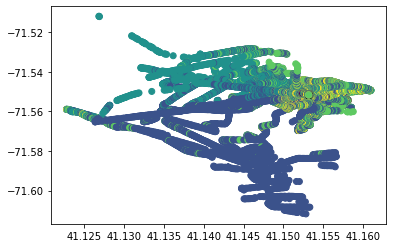

In [18]:
plt.scatter(SE_Light.Y,SE_Light.X,c=SE_Light.port)

In [9]:
BRR = data_dataframe[data_dataframe['recvDeployName'] =='SE_Light_434']

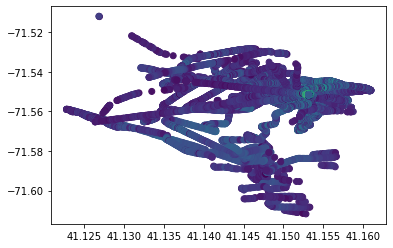

In [10]:
plt.scatter(BRR.Y,BRR.X,c=BRR.sig)